In [ ]:
# 상관계수 만들기 OIL PRESENT, 나프타, 황중유, 

In [57]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("화이팅_ㅋ.csv")

In [31]:
df

,주차,SCFI,코로나확진자,환율,WTI유가,나프타유가,고유황중유가
0,2013-1,1148.08,0.0,1056.49,93.56,106.6980,96.1060
1,2013-2,1232.35,0.0,1058.35,95.56,105.0360,97.7760
2,2013-3,1245.84,0.0,1075.58,95.88,103.4800,97.2140
3,2013-4,1227.84,0.0,1095.19,97.77,106.6620,97.4920
4,2013-5,1219.39,0.0,1096.00,95.72,108.1780,98.5660
...,...,...,...,...,...,...,...
584,2024-15,1757.04,39459.0,1374.30,83.14,74.9875,79.6475
585,2024-16,1769.54,31841.0,1376.43,83.85,74.3400,80.8120
586,2024-17,1940.63,34278.0,1354.63,78.11,75.0220,80.4920
587,2024-19,2305.79,33678.0,1351.76,80.06,71.8160,81.2640


In [43]:
# 날짜를 인덱스로 설정
df.set_index('주차', inplace=True)

In [48]:
df.drop(df.index[563:570], inplace=True)

In [53]:
df

,SCFI,코로나확진자,환율,WTI유가,나프타유가,고유황중유가
주차,,,,,,
2013-1,1148.08,0.0,1056.49,93.56,106.6980,96.1060
2013-2,1232.35,0.0,1058.35,95.56,105.0360,97.7760
2013-3,1245.84,0.0,1075.58,95.88,103.4800,97.2140
2013-4,1227.84,0.0,1095.19,97.77,106.6620,97.4920
2013-5,1219.39,0.0,1096.00,95.72,108.1780,98.5660
...,...,...,...,...,...,...
2024-15,1757.04,39459.0,1374.30,83.14,74.9875,79.6475
2024-16,1769.54,31841.0,1376.43,83.85,74.3400,80.8120
2024-17,1940.63,34278.0,1354.63,78.11,75.0220,80.4920


In [54]:
df.drop('환율', axis=1, inplace=True)

In [56]:
df.to_excel('df.xlsx', index=True)

In [62]:
df

,SCFI,코로나확진자,WTI유가,나프타유가,고유황중유가
주차,,,,,
2013-1,1148.08,0.0,93.56,106.6980,96.1060
2013-2,1232.35,0.0,95.56,105.0360,97.7760
2013-3,1245.84,0.0,95.88,103.4800,97.2140
2013-4,1227.84,0.0,97.77,106.6620,97.4920
2013-5,1219.39,0.0,95.72,108.1780,98.5660
...,...,...,...,...,...
2024-15,1757.04,39459.0,83.14,74.9875,79.6475
2024-16,1769.54,31841.0,83.85,74.3400,80.8120
2024-17,1940.63,34278.0,78.11,75.0220,80.4920


In [72]:
X = df.drop(['SCFI'],axis=1)
Y = df['SCFI']

In [77]:
Y.describe()

count     581.000000
mean     1423.075955
std      1153.569656
min       400.430000
25%       806.810000
50%       961.880000
75%      1176.120000
max      5109.600000
Name: SCFI, dtype: float64

In [73]:
scaler_X = RobustScaler()
scaled_X = scaler_X.fit_transform(X)

scaler_Y = RobustScaler()
scaled_Y = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

In [75]:
# 데이터셋을 훈련, 검증 및 테스트 세트로 분할
x_train, x_temp, y_train, y_temp = train_test_split(scaled_X, scaled_Y, test_size=0.4, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

Epoch 1/100
35/35 [==============================] - 2s 15ms/step - loss: 11.8927 - mae: 1.7376 - val_loss: 9.4145 - val_mae: 1.7626
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 8.7990 - mae: 1.7639 - val_loss: 7.8105 - val_mae: 1.7141
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 7.1391 - mae: 1.6305 - val_loss: 5.9214 - val_mae: 1.5221
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 5.0692 - mae: 1.3578 - val_loss: 3.6381 - val_mae: 1.1779
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 3.5991 - mae: 1.1407 - val_loss: 2.4600 - val_mae: 0.9197
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 3.4659 - mae: 1.1130 - val_loss: 2.9129 - val_mae: 1.3089
Epoch 7/100
35/35 [==============================] - 0s 6ms/step - loss: 2.9385 - mae: 1.0266 - val_loss: 2.0024 - val_mae: 0.8102
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: 7.4996 -

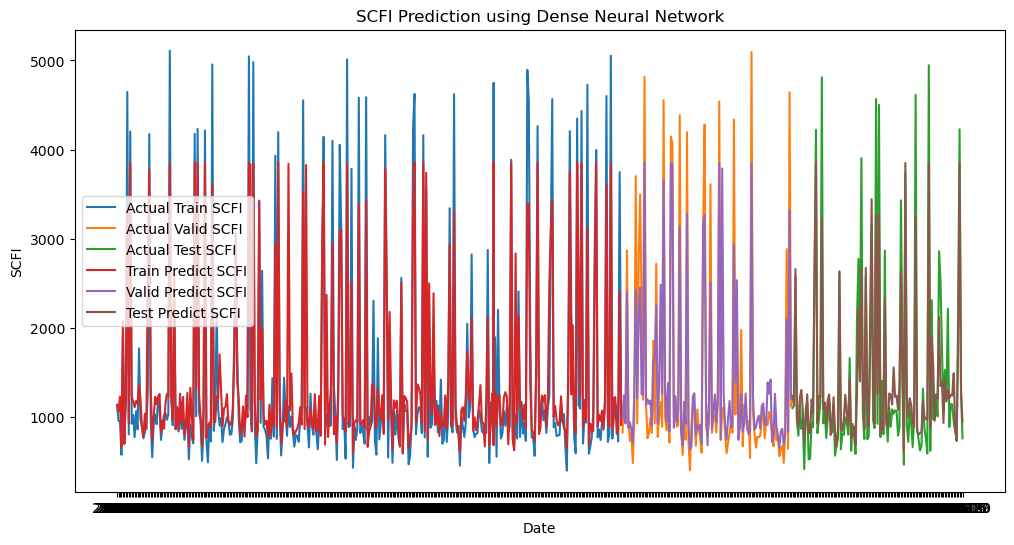

In [78]:
# Dense 신경망 모델 생성
model = Sequential()
model.add(Dense(units=30, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 모델 훈련
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=100, batch_size=10, verbose=1)

# 모델 평가
loss, mae = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test MAE: {mae:.3f}')

# 모델 예측
train_predict = model.predict(x_train)
valid_predict = model.predict(x_valid)
test_predict = model.predict(x_test)

# 예측 데이터 역정규화
train_predict = scaler_Y.inverse_transform(train_predict)
valid_predict = scaler_Y.inverse_transform(valid_predict)
test_predict = scaler_Y.inverse_transform(test_predict)

# 실제 데이터 역정규화
y_train_actual = scaler_Y.inverse_transform(y_train)
y_valid_actual = scaler_Y.inverse_transform(y_valid)
y_test_actual = scaler_Y.inverse_transform(y_test)


In [79]:
loss, mae = model.evaluate(x_test,y_test)
print(f'Test loss:{loss:.3f}')
print(f'Test MAE:{mae:.3f}')

4/4 [==============================] - 0s 5ms/step - loss: 1.2861 - mae: 0.7624
Test loss:1.286
Test MAE:0.762
